In [7]:
%matplotlib inline 
from ase.build import fcc111, add_adsorbate # ASE's utilities to build the surface
from clusterx.parent_lattice import ParentLattice 
from clusterx.structures_set import StructuresSet
from clusterx.visualization import juview
from clusterx.super_cell import SuperCell
from random import randint
import numpy as np
np.random.seed(10)

from ase.build import molecule
atoms = molecule('CO2')

pri =fcc111('Pd', a=3.939, size=(1,1,3))
add_adsorbate(pri,atoms,4.2,'ontop')
pri.center(vacuum=20.0, axis=2)
juview(pri)

NGLWidget()

In [8]:
symbols = pri.get_chemical_symbols() # Get Chemical symbols of slab
z_coords = pri.get_positions()[:,2] # Get z-coordinate of atomic positions in slab

print("{0:<19s}|{1:<19s}|{2:<19s}".format("Atom index","Chemical symbol","z coordinate")) # Print headers
for i, (symbol, z_coord) in enumerate(zip(symbols,z_coords)):
    print("{0:<19d}|{1:<19s}|{2:<19.3f}".format(i,symbol,z_coord)) # Print atom indexes, symbols and z_coordinat

Atom index         |Chemical symbol    |z coordinate       
0                  |Pd                 |20.000             
1                  |Pd                 |22.274             
2                  |Pd                 |24.548             
3                  |C                  |28.748             
4                  |O                  |29.927             
5                  |O                  |27.570             


In [9]:
platt = ParentLattice(pri, symbols= [['Pd', 'Zn'], ['Pd', 'Zn'], ['Pd', 'Zn'], ['C'], ['O'], ['O']])
juview(platt)

/home/lara/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [10]:
platt.get_sublattice_types(pretty_print=True)


+--------------------------------------------------------------------+
|              The structure consists of 3 sublattices               |
+--------------------------------------------------------------------+
| Sublattice type |       Chemical symbols       |  Atomic numbers   |
+--------------------------------------------------------------------+
|        0        |            ['C']             |        [6]        |
|        1        |            ['O']             |        [8]        |
|        2        |         ['Pd' 'Zn']          |      [46 30]      |
+--------------------------------------------------------------------+



In [11]:
scell = SuperCell(platt,[4,4])
juview(scell)

scell.get_sublattice_types(pretty_print=True)

    
sset = StructuresSet(platt)
z_coords_2 = scell.get_positions()[:]

nstruc = 60 # we are generating 60 ramdom structures
for i in range(nstruc):
    concentration = {2:[randint(1,16*3)]} # Pick a random concentration of "Zn" substitutions starting from 1 to 4*4*3
    
    sset.add_structure(scell.gen_random(concentration)) # Generate and add a random structure to the StructuresSet

print("\nRandom structures (first 3) of nstru:")
sset.serialize("sset.json") # Write JSON db file for visualization with ASE's GUI.
juview(sset,n=3) # Plot the first 3 created random structrues



+--------------------------------------------------------------------+
|              The structure consists of 3 sublattices               |
+--------------------------------------------------------------------+
| Sublattice type |       Chemical symbols       |  Atomic numbers   |
+--------------------------------------------------------------------+
|        0        |            ['C']             |        [6]        |
|        1        |            ['O']             |        [8]        |
|        2        |         ['Pd' 'Zn']          |      [46 30]      |
+--------------------------------------------------------------------+


Random structures (first 3) of nstru:


In [12]:
from clusterx.calculators.emt import EMT2 # Load the EMT calculator from ASE
from clusterx.visualization import plot_property_vs_concentration

sset.set_calculator(EMT2())
sset.calculate_property("total_energy_emt") # Calculate energies with Effective Medium Theory calculator of ASE, the output below is the enrgies of the 60 structures

[25.634314970558968,
 28.8021106841269,
 23.816895104328257,
 21.758108555340474,
 22.869289768612457,
 21.796306544801727,
 21.616153215671964,
 22.133852790159555,
 21.643219263293652,
 24.894901599171792,
 21.936815081641313,
 22.236144580962332,
 21.80084537980959,
 21.800171101716227,
 21.81087256160727,
 26.374466395442873,
 26.36316451411612,
 24.84359060249658,
 21.82025553314417,
 21.9565170237994,
 21.49192517995023,
 21.684890841709766,
 21.60895288112561,
 24.244897964855827,
 22.587818219719185,
 21.749313347681966,
 22.01201017433126,
 21.702144391312288,
 24.113541131511763,
 26.639091214423892,
 21.983801512656083,
 22.028512481810676,
 26.581536882595344,
 23.766355550629292,
 22.269844582248886,
 22.15347512925516,
 21.632720711940674,
 28.50259299477714,
 24.035933836737684,
 21.54928902545266,
 22.10756461406266,
 24.555481620345667,
 28.49358886447592,
 27.273663706533405,
 23.92032794843334,
 28.8021106841272,
 27.8277440402061,
 24.68380787963434,
 21.83263705326

In [9]:
#In the next cell, we will create a small structures set containing just two structures: one pristine, non-substituted (all Pd) and free of adsorbants, and the other a fully substituted one (Pd->Zn), still without O adsorbants. NO CO2 HERE. The energies 𝐸0 and 𝐸1 of these structures will serve as references for generating figures depicting the total energy versus concentration: 𝑒=𝐸−𝐸0∗(1−𝑥)+𝐸1∗𝑥, with 𝐸 the EMT energy of the structure and 𝑥 the Zn concentration.

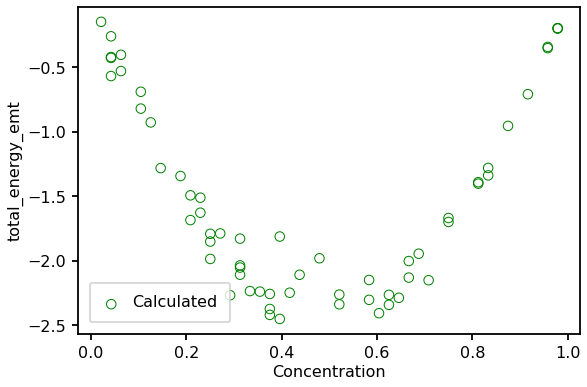

{'concentration': [0.75,
  0.9791666666666666,
  0.6041666666666666,
  0.020833333333333332,
  0.3958333333333333,
  0.1875,
  0.25,
  0.3541666666666667,
  0.2916666666666667,
  0.6875,
  0.22916666666666666,
  0.3125,
  0.20833333333333334,
  0.041666666666666664,
  0.25,
  0.8125,
  0.8125,
  0.7083333333333334,
  0.22916666666666666,
  0.3125,
  0.041666666666666664,
  0.0625,
  0.20833333333333334,
  0.6458333333333334,
  0.4166666666666667,
  0.125,
  0.3125,
  0.10416666666666667,
  0.625,
  0.8333333333333334,
  0.3333333333333333,
  0.3125,
  0.8333333333333334,
  0.5833333333333334,
  0.375,
  0.375,
  0.041666666666666664,
  0.9583333333333334,
  0.625,
  0.14583333333333334,
  0.375,
  0.6666666666666666,
  0.9583333333333334,
  0.875,
  0.5833333333333334,
  0.9791666666666666,
  0.9166666666666666,
  0.6666666666666666,
  0.10416666666666667,
  0.9791666666666666,
  0.5208333333333334,
  0.5208333333333334,
  0.0625,
  0.75,
  0.4375,
  0.25,
  0.041666666666666664,
  0.2

In [13]:
refs = StructuresSet(platt)
refs.add_structure(scell.gen_random({2:[0]})) # Pristine
refs.add_structure(scell.gen_random({2:[0],2:[48]})) # Full Zn substitution 3*4*4

refs.set_calculator(EMT2())
refs.calculate_property("total_energy_emt_refs")
ref_en = refs.get_property_values("total_energy_emt_refs")

plot_property_vs_concentration(sset, site_type=2, property_name="total_energy_emt",refs=ref_en,scale=0.6)


In [14]:
#The next step is to create a pool of cluters:
r=3.5
from clusterx.clusters.clusters_pool import ClustersPool
cpool = ClustersPool(platt, npoints=[0,1,2,3,4], radii=[0,0,r,r,r])
print(len(cpool)," clusters were generated.")

23  clusters were generated.


In [15]:
cpool.serialize(db_name="cpool.json")
juview(cpool.get_cpool_atoms(),n=6)

In [16]:
#building the CE model using linear regression method (other methods are available too)
from clusterx.model import ModelBuilder

mb = ModelBuilder(selector_type="linreg",selector_opts={'clusters_sets':'size'},estimator_type="skl_LinearRegression",estimator_opts={"fit_intercept":False})
cemodel1 = mb.build(sset, cpool, "total_energy_emt") #Build CE model using the training data set
cpool_opt1 = mb.get_opt_cpool()

cemodel1.report_errors(sset)
cpool_opt1.display_info(ecis=cemodel1.get_ecis())
cpool_opt1.write_clusters_db(db_name="cpool_opt.json")


+-----------------------------------------------------------+
|                Report of Fit and CV scores                |
+-----------------------------------------------------------+
|                   |        Fit        |        CV         |
+-----------------------------------------------------------+
|       RMSE        |      0.01400      |      0.02213      |
|        MAE        |      0.01004      |      0.01532      |
|       MaxAE       |      0.04291      |      0.06799      |
+-----------------------------------------------------------+


+-------------------------------------------------------------------------------+
|                             Clusters Pool Info                                |
+-------------------------------------------------------------------------------+
|       Index       |   Nr. of points   |      Radius       |        ECI        |
+-------------------------------------------------------------------------------+
|         0         |        

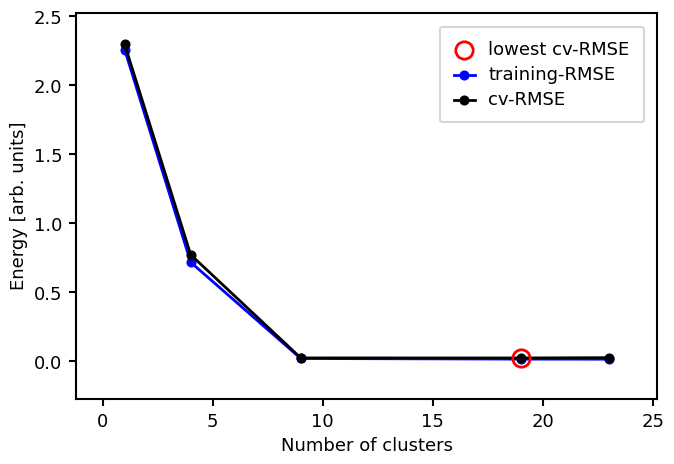

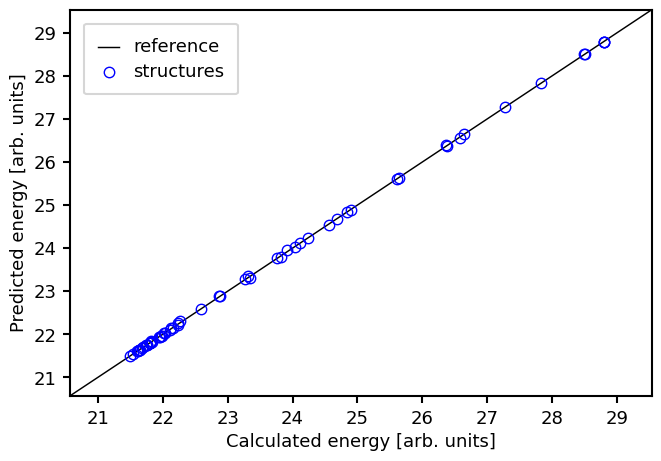

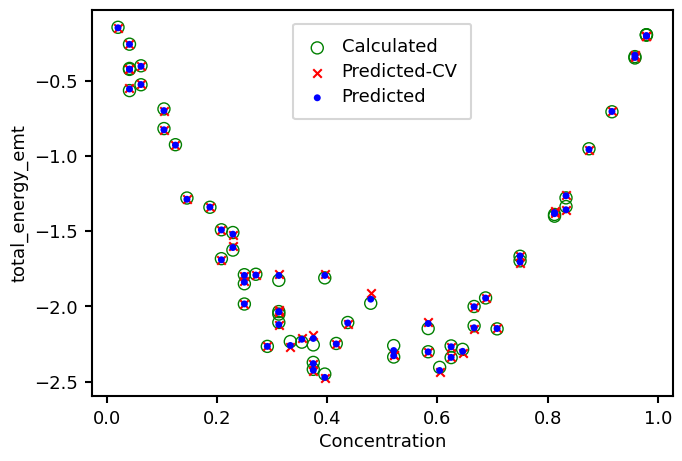

{'concentration': [0.75,
  0.9791666666666666,
  0.6041666666666666,
  0.020833333333333332,
  0.3958333333333333,
  0.1875,
  0.25,
  0.3541666666666667,
  0.2916666666666667,
  0.6875,
  0.22916666666666666,
  0.3125,
  0.20833333333333334,
  0.041666666666666664,
  0.25,
  0.8125,
  0.8125,
  0.7083333333333334,
  0.22916666666666666,
  0.3125,
  0.041666666666666664,
  0.0625,
  0.20833333333333334,
  0.6458333333333334,
  0.4166666666666667,
  0.125,
  0.3125,
  0.10416666666666667,
  0.625,
  0.8333333333333334,
  0.3333333333333333,
  0.3125,
  0.8333333333333334,
  0.5833333333333334,
  0.375,
  0.375,
  0.041666666666666664,
  0.9583333333333334,
  0.625,
  0.14583333333333334,
  0.375,
  0.6666666666666666,
  0.9583333333333334,
  0.875,
  0.5833333333333334,
  0.9791666666666666,
  0.9166666666666666,
  0.6666666666666666,
  0.10416666666666667,
  0.9791666666666666,
  0.5208333333333334,
  0.5208333333333334,
  0.0625,
  0.75,
  0.4375,
  0.25,
  0.041666666666666664,
  0.2

In [17]:
from clusterx.visualization import plot_optimization_vs_number_of_clusters
from clusterx.visualization import plot_predictions_vs_target
plot_optimization_vs_number_of_clusters(mb.get_selector(),scale=0.5)
plot_predictions_vs_target(sset,cemodel1,"total_energy_emt",scale=0.5)
plot_property_vs_concentration(sset, site_type=2, property_name="total_energy_emt",cemodel=cemodel1,refs=ref_en,scale=0.5)

In [ ]:
# more accurate set
mb = ModelBuilder(selector_type="linreg",selector_opts={'clusters_sets':'size+combinations','nclmax':8,'set0':[7,3.5]},estimator_type="skl_LinearRegression",estimator_opts={"fit_intercept":False})
cemodel3 = mb.build(sset, cpool, "total_energy_emt") #Build CE model using the training data set
cpool_opt3 = mb.get_opt_cpool()

cemodel3.report_errors(sset)
cpool_opt3.display_info(ecis=cemodel3.get_ecis())
cpool_opt3.write_clusters_db(db_name="cpool_opt3.json")

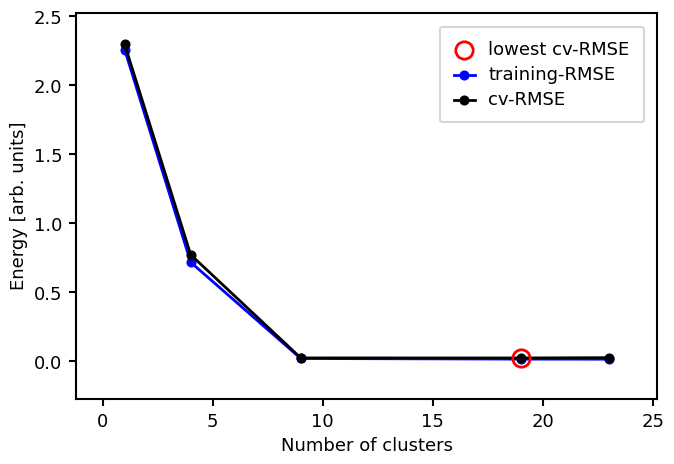

NameError: name 'cemodel3' is not defined

In [20]:
plot_optimization_vs_number_of_clusters(mb.get_selector(),scale=0.5)
plot_predictions_vs_target(sset,cemodel3,"total_energy_emt",scale=0.5)
plot_property_vs_concentration(sset, site_type=2, property_name="total_energy_emt",cemodel=cemodel3,refs=ref_en,scale=0.5)